In [8]:
#pip install snowflake

  Obtaining dependency information for snowflake from https://files.pythonhosted.org/packages/f2/cf/301ea97d07d1dceba824dca361580eb0b17932d6c9d38cd4d8ffec5137dd/snowflake-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for snowflake-core==1.0.1 from https://files.pythonhosted.org/packages/06/7e/0bd5a3aa501bec3fec99842f99afecfe92de7370025db1c0af4391d27086/snowflake_core-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for snowflake-legacy from https://files.pythonhosted.org/packages/aa/8c/64f9b5ee0c3f376a733584c480b31addbf2baff7bb41f655e5e3f3719d3b/snowflake_legacy-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for atpublic>=4 from https://files.pythonhosted.org/packages/6b/03/2cb0e5326e19b7d877bc9c3a7ef436a30a06835b638580d1f5e21a0409ed/atpublic-5.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/df/e4/ba44652d562cbf0bf320e0f3810206149c8a4e99cdbf66da82e97ab5

In [1]:
# !pip install pandas
# !pip install datetime

import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [7]:
# conn = snowflake.connector.connect(account ='justworks-main.privatelink',
#                                          user= 'lmola@justworks.com',
#                                          authenticator="externalbrowser")
# cur = conn.cursor()

# establishing connection to Snowflake

conn = snowflake.connector.connect(account ='justworks-main',
                                         user= 'lmola@justworks.com',
                                         authenticator="externalbrowser")
#cur = conn.cursor()
#cur.execute("USE DATABASE prod_ent_db;")

## data for model stored in static table in Snowflake
#data=cur.execute('select * from prod_ent_db.salesforce.lead limit 10')

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZPdjtowEIVfJXKvEychP8UCVnTpqqhsl0K2F9w5jgMuiZ16HLL06esQkLaqdqVKvrDGM%2F7OzLEndy915Zy4BqHkFAWejxwumSqE3E%2FRc%2FbgfkQOGCoLWinJp%2BjMAd3NJkDrqiHz1hzkhv9qORjHXiSB9AdT1GpJFAUBRNKaAzGMbOePKxJ6PqEAXBuLQ9eSAoRlHYxpCMZd13ndyFN6j0Pf97E%2FxjarT%2FmAXiGa9xmNVkYxVd1KXmxPbyAC7Ec9wmZYwvpa%2BEnIYQTvUfIhCciXLFu766dthpz5rbt7JaGtud5yfRKMP29WgwCwCn62YDqlj%2BDWVEgPpOrKih45U3XTGnulZ3e45AWu1F7YQS0XU9QcRRE%2FhYvD18V3OO3Gq%2Bh3TkWQasvdnHeCsq5upVguM3Y8Np8Zcn7cbA17W5cALV%2FK3kxjQ34YuUHgBlEWRKRfIy8eJzvkLKyZQlJzqfxHsccq1RZWreaUMQ5wkcoK6bK9wEMIAyjcu4SLNMqZn%2BSMxjQvkyRJUxokNAh4Eo5invqlT1kalz6PkpCxgtNxmsc5y2NG8%2FF4hIaXRi7a9ey%2F5jf

KeyboardInterrupt: 

In [16]:
conn = snowflake_con('lmola@justworks.com')

NameError: name 'snowflake_con' is not defined

In [20]:
conn_params = {
    'account': os.getenv('SNOWFLAKE_ACCOUNT'),
    'user': os.getenv('SNOWFLAKE_USER'),
    'password': os.getenv('SNOWFLAKE_PASSWORD'),
    'warehouse': os.getenv('SNOWFLAKE_WAREHOUSE'),
    'database': os.getenv('SNOWFLAKE_DATABASE'),
    'schema': os.getenv('SNOWFLAKE_SCHEMA')
}
conn = snowflake.connector.connect(**conn_params)

AttributeError: 'NoneType' object has no attribute 'find'

In [10]:
# Define your SQL query
query = "SELECT * FROM prod_ent_db.salesforce.lead LIMIT 10"  # Replace with your actual table and query


# Execute the query and fetch results as a DataFrame
with conn.cursor() as cur:
    cur.execute(query)
    df = cur.fetch_pandas_all()  # Fetch the results as a pandas DataFrame

# Display the DataFrame
df.head()

NameError: name 'conn' is not defined

In [ ]:
# import jinja2
# raw_query = """
#     select * from prod_analytics_db.salesforce.INT_SALESFORCE__LEADS_ENRICHED limit 10;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select l.CONTACT_ID,
#     l.owner_id,
#     u.name,
#     l.LEAD_ID,
#     l.OPPORTUNITY_ID,
#     l.MATCHED_ACCOUNT_ID,
#     l.MEMBER_ID,
#     l.LEAD_SOURCE,
#     l.OTHER_SOURCE,
#     l.LEAD_UTM_MEDIUM,
#     l.LEAD_UTM_CONTENT,
#     l.FIRST_CONVERSION,
#     l.LEAD_SCORE,
#     l.LEAD_SIGNUP_DATE,
#     l.FEATURES_INTERESTING_PROSPECT,
#     l.COMPANY_SIZE,
#     l.INDUSTRY_CATEGORY,
#     l.COMPETITOR,
#     l.IS_HEALTHCARE_WANTED,
#     l.IS_CONVERTED,
#     l.POSTAL_CODE,
#     l.IS_CONVERTED_TO_ACCOUNT,
#     l.IS_CONVERTED_TO_OPPORTUNITY,
#     to_date(o.date_interested__c) as io_date,
#     o.id AS opp_id, 
#     o.name AS opp_name
#     
#     from prod_analytics_db.salesforce.INT_SALESFORCE__LEADS_ENRICHED l
#     left join prod_ent_db.salesforce.lead l2
#         on l.lead_id= l2.id 
#     left join prod_ent_db.salesforce.opportunity o
#         on l.contact_id= o.contactid 
#     left JOIN prod_ent_db.salesforce.user u 
#         ON l.owner_id = u.id 
#     -- left join prod_ent_db.salesforce.invoca_leads i
#     --     on i.lead_id = l.id
#     
#     WHERE   l.lead_created_date >= '2022-06-01' 
#             and (
#                 (lower(l.lead_source) in ('paid search', 'direct traffic', 'organic search', 'affiliate', 'event', 
#                 'paid social', 'paid social media', 'direct mail', 'inbound call', 'out of home', 'programmatic', 
#                 'paid display', 'referral program', 'social media', 'warm outbound', 'multi-entity deal'))
#                 OR (l.lead_name IN ('Self Service Team','Inbound SDA'))
#                 OR (lower(l2.bizible2__marketing_channel_lc__c) in ('paid search', 'direct traffic', 'organic search', 
#                 'affiliate', 'event', 'paid social', 'paid social media', 'direct mail', 'inbound call', 'out of home', 
#                 'programmatic', 'paid display', 'referral program', 'social media', 'warm outbound', 'multi-entity deal'))
#                 OR (l.owner_id IN ('00G0H000005CWQZUA4','00G0H000006IFoXUAW','00G0H000005JjpfUAC'))
#                 OR (l2.createdbyid IN ('005PJ000002voWnYAI'))
#             )
#     
#             ;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
lead_to_io_df = dataframe_6.copy()

lead_to_io_df[~(lead_to_io_df['LEAD_ID'].isna()) & (~lead_to_io_df['OPP_ID'].isna())]


,CONTACT_ID,OWNER_ID,NAME,LEAD_ID,OPPORTUNITY_ID,MATCHED_ACCOUNT_ID,MEMBER_ID,LEAD_SOURCE,OTHER_SOURCE,LEAD_UTM_MEDIUM,...,INDUSTRY_CATEGORY,COMPETITOR,IS_HEALTHCARE_WANTED,IS_CONVERTED,POSTAL_CODE,IS_CONVERTED_TO_ACCOUNT,IS_CONVERTED_TO_OPPORTUNITY,IO_DATE,OPP_ID,OPP_NAME
0,003PJ0000068f2cYAA,005i0000007OWDTAA4,Self Service Team,00QPJ000006YR2R2AW,006PJ000006qeigYAA,None,None,organic search,Google Natural Search,None,...,None,None,False,True,91351,True,True,2024-02-10,006PJ000006qeigYAA,Remaxone
1,0036S00005xX4qNQAS,005i0000007OmWbAAK,Marissa Zehnder,00Q6S000028USFEUA4,0066S000015V8sWQAS,None,None,event,None,None,...,None,None,None,True,09127,True,True,2023-03-15,0066S000015V8sWQAS,Biz Consulting Inc - Partner
2,003PJ00000ATzAPYA1,005i0000007OWDTAA4,Self Service Team,00QPJ00000AxPUT2A3,006PJ00000B8BzFYAV,None,None,paid social media,facebook,cpc,...,Consulting,None,True,True,61603,True,True,2024-07-07,006PJ00000B8BzFYAV,Chris Wade and Associates LLC
3,0036S000063FaCOQA0,005i0000007OWDTAA4,Self Service Team,00Q6S00002AnjLJUAZ,0066S0000192qDQQAY,None,None,paid search,None,None,...,None,None,None,True,None,True,True,2023-07-12,0066S0000192qDQQAY,188 S 8th St Realty Too LLC
4,0036S000061UDvkQAG,0056S00000HCnkmQAD,Tiara Gill,00Q6S00002A9sSyUAJ,0066S0000177BNsQAM,None,None,organic search,www.google.com,None,...,None,None,True,True,76033,True,True,2023-05-22,0066S0000177BNsQAM,"Cleburne Eendoscopy Center, LLC-"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130074,003PJ000003v903YAA,005i0000007OWDTAA4,Self Service Team,00QPJ000004GJil2AG,006PJ000004RdnnYAC,001PJ000003jUrTYAU,None,direct traffic,None,None,...,None,None,True,True,30901,True,True,2023-12-06,006PJ000004RdnnYAC,HUB for Community Innovation
130075,0036S00005soQZQQA2,005i0000007OWDTAA4,Self Service Team,00Q6S000026dQqxUAE,0066S000013XlAaQAK,None,None,direct traffic,None,None,...,None,None,None,True,30236,True,True,2022-11-15,0066S000013XlAaQAK,Little Giant Farmers Market
130076,0036S00005xTkCnQAK,005i0000007OWDTAA4,Self Service Team,00Q6S000028Wd1vUAC,0066S000015ToRBQA0,None,None,direct traffic,None,digital,...,None,None,False,True,91331,True,True,2023-02-02,0066S000015ToRBQA0,09/28/2018
130077,003PJ000006x7ekYAA,005i0000007OWDTAA4,Self Service Team,00QPJ000007KWuB2AW,006PJ000007beQjYAI,None,None,direct traffic,None,None,...,None,ADP,False,True,91604,True,True,2024-03-05,006PJ000007beQjYAI,Jerde Analytics


In [ ]:
# Calculate percentage of missing data for each column
missing_df = lead_to_io_df.isnull().mean() * 100
print(missing_df)

CONTACT_ID                       83.006028
OWNER_ID                          0.000000
NAME                             21.222687
LEAD_ID                           0.000000
OPPORTUNITY_ID                   89.144368
MATCHED_ACCOUNT_ID               52.416880
MEMBER_ID                        99.671841
LEAD_SOURCE                       2.154279
OTHER_SOURCE                     83.052908
LEAD_UTM_MEDIUM                  68.430035
LEAD_UTM_CONTENT                 90.961698
FIRST_CONVERSION                 89.271090
LEAD_SCORE                       62.311473
LEAD_SIGNUP_DATE                  0.859954
FEATURES_INTERESTING_PROSPECT    73.235960
COMPANY_SIZE                     70.079623
INDUSTRY_CATEGORY                96.614391
COMPETITOR                       84.424146
IS_HEALTHCARE_WANTED             83.551740
IS_CONVERTED                      0.000000
POSTAL_CODE                      67.603044
IS_CONVERTED_TO_ACCOUNT           0.000000
IS_CONVERTED_TO_OPPORTUNITY       0.000000
IO_DATE    

In [ ]:
lead_to_io_df['Converted_to_Opp'] = lead_to_io_df['OPP_ID'].apply(lambda x: 1 if pd.notna(x) else 0)
lead_to_io_df['Converted_to_Opp'].mean()

0.14730550326328204

In [ ]:
# Calculate the correlation between column1 and column2
correlation = lead_to_io_df['Converted_to_Opp'].corr(lead_to_io_df['LEAD_SCORE'])

print("Correlation:", correlation)

Correlation: -0.002489098605575526


In [ ]:
lead_to_io_df.dtypes

CONTACT_ID                        object
OWNER_ID                          object
NAME                              object
LEAD_ID                           object
OPPORTUNITY_ID                    object
MATCHED_ACCOUNT_ID                object
MEMBER_ID                         object
LEAD_SOURCE                       object
OTHER_SOURCE                      object
LEAD_UTM_MEDIUM                   object
LEAD_UTM_CONTENT                  object
FIRST_CONVERSION                  object
LEAD_SCORE                       float64
LEAD_SIGNUP_DATE                  object
FEATURES_INTERESTING_PROSPECT     object
COMPANY_SIZE                      object
INDUSTRY_CATEGORY                 object
COMPETITOR                        object
IS_HEALTHCARE_WANTED              object
IS_CONVERTED                        bool
POSTAL_CODE                       object
IS_CONVERTED_TO_ACCOUNT             bool
IS_CONVERTED_TO_OPPORTUNITY         bool
IO_DATE                           object
OPP_ID          

In [ ]:
lead_to_io_df.isnull().sum()

CONTACT_ID                       113319
OWNER_ID                              0
NAME                              28973
LEAD_ID                               0
OPPORTUNITY_ID                   121699
MATCHED_ACCOUNT_ID                71559
MEMBER_ID                        136071
LEAD_SOURCE                        2941
OTHER_SOURCE                     113383
LEAD_UTM_MEDIUM                   93420
LEAD_UTM_CONTENT                 124180
FIRST_CONVERSION                 121872
LEAD_SCORE                        85067
LEAD_SIGNUP_DATE                   1174
FEATURES_INTERESTING_PROSPECT     99981
COMPANY_SIZE                      95672
INDUSTRY_CATEGORY                131897
COMPETITOR                       115255
IS_HEALTHCARE_WANTED             114064
IS_CONVERTED                          0
POSTAL_CODE                       92291
IS_CONVERTED_TO_ACCOUNT               0
IS_CONVERTED_TO_OPPORTUNITY           0
IO_DATE                          118246
OPP_ID                           116409


In [ ]:

categorical_columns = lead_to_io_df.select_dtypes(include=['object']).columns
unique_values = {col: lead_to_io_df[col].nunique() for col in categorical_columns}

for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

CONTACT_ID: 22042 unique values
OWNER_ID: 414 unique values
NAME: 405 unique values
LEAD_ID: 135517 unique values
OPPORTUNITY_ID: 14189 unique values
MATCHED_ACCOUNT_ID: 29457 unique values
MEMBER_ID: 294 unique values
LEAD_SOURCE: 16 unique values
OTHER_SOURCE: 204 unique values
LEAD_UTM_MEDIUM: 73 unique values
LEAD_UTM_CONTENT: 378 unique values
FIRST_CONVERSION: 16 unique values
LEAD_SIGNUP_DATE: 986 unique values
FEATURES_INTERESTING_PROSPECT: 7 unique values
COMPANY_SIZE: 1363 unique values
INDUSTRY_CATEGORY: 6 unique values
COMPETITOR: 41 unique values
IS_HEALTHCARE_WANTED: 2 unique values
POSTAL_CODE: 12138 unique values
IO_DATE: 1001 unique values
OPP_ID: 19927 unique values
OPP_NAME: 19084 unique values


In [ ]:
def categorize_employees(num_employees):
    # Check if value is not None and is a number
    if num_employees is None:
        return 'None'
    elif num_employees < 7:
        return '< 7'
    elif 7 <= num_employees <= 15:
        return '7 - 15'
    elif 16 <= num_employees <= 49:
        return '16 - 49'
    elif num_employees >= 50:
        return '50 +'
    else:
        return 'Other'

In [ ]:
lead_to_io_df[['COMPANY_SIZE']].dtypes

COMPANY_SIZE    object
dtype: object

In [ ]:
lead_to_io_df["COMPANY_SIZE"] = pd.to_numeric(lead_to_io_df["COMPANY_SIZE"], errors='coerce')

In [ ]:
lead_to_io_df["size_category"] = lead_to_io_df["COMPANY_SIZE"].apply(
    categorize_employees
)
lead_to_io_df.head()

,CONTACT_ID,OWNER_ID,NAME,LEAD_ID,OPPORTUNITY_ID,MATCHED_ACCOUNT_ID,MEMBER_ID,LEAD_SOURCE,OTHER_SOURCE,LEAD_UTM_MEDIUM,...,IS_HEALTHCARE_WANTED,IS_CONVERTED,POSTAL_CODE,IS_CONVERTED_TO_ACCOUNT,IS_CONVERTED_TO_OPPORTUNITY,IO_DATE,OPP_ID,OPP_NAME,Converted_to_Opp,size_category
0,003PJ0000068f2cYAA,005i0000007OWDTAA4,Self Service Team,00QPJ000006YR2R2AW,006PJ000006qeigYAA,None,None,organic search,Google Natural Search,None,...,False,True,91351,True,True,2024-02-10,006PJ000006qeigYAA,Remaxone,1,< 7
1,0036S00005xX4qNQAS,005i0000007OmWbAAK,Marissa Zehnder,00Q6S000028USFEUA4,0066S000015V8sWQAS,None,None,event,None,None,...,None,True,09127,True,True,2023-03-15,0066S000015V8sWQAS,Biz Consulting Inc - Partner,1,Other
2,003PJ00000ATzAPYA1,005i0000007OWDTAA4,Self Service Team,00QPJ00000AxPUT2A3,006PJ00000B8BzFYAV,None,None,paid social media,facebook,cpc,...,True,True,61603,True,True,2024-07-07,006PJ00000B8BzFYAV,Chris Wade and Associates LLC,1,< 7
3,0036S000063FaCOQA0,005i0000007OWDTAA4,Self Service Team,00Q6S00002AnjLJUAZ,0066S0000192qDQQAY,None,None,paid search,None,None,...,None,True,None,True,True,2023-07-12,0066S0000192qDQQAY,188 S 8th St Realty Too LLC,1,< 7
4,0036S000061UDvkQAG,0056S00000HCnkmQAD,Tiara Gill,00Q6S00002A9sSyUAJ,0066S0000177BNsQAM,None,None,organic search,www.google.com,None,...,True,True,76033,True,True,2023-05-22,0066S0000177BNsQAM,"Cleburne Eendoscopy Center, LLC-",1,Other


In [ ]:

categorical_columns = lead_to_io_df.select_dtypes(include=['object']).columns
unique_values = {col: lead_to_io_df[col].nunique() for col in categorical_columns}

for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

CONTACT_ID: 22042 unique values
OWNER_ID: 414 unique values
NAME: 405 unique values
LEAD_ID: 135517 unique values
OPPORTUNITY_ID: 14189 unique values
MATCHED_ACCOUNT_ID: 29457 unique values
MEMBER_ID: 294 unique values
LEAD_SOURCE: 16 unique values
OTHER_SOURCE: 204 unique values
LEAD_UTM_MEDIUM: 73 unique values
LEAD_UTM_CONTENT: 378 unique values
FIRST_CONVERSION: 16 unique values
LEAD_SIGNUP_DATE: 986 unique values
FEATURES_INTERESTING_PROSPECT: 7 unique values
INDUSTRY_CATEGORY: 6 unique values
COMPETITOR: 41 unique values
IS_HEALTHCARE_WANTED: 2 unique values
POSTAL_CODE: 12138 unique values
IO_DATE: 1001 unique values
OPP_ID: 19927 unique values
OPP_NAME: 19084 unique values
size_category: 5 unique values


In [ ]:
lead_to_io_df.columns

Index(['CONTACT_ID', 'OWNER_ID', 'NAME', 'LEAD_ID', 'OPPORTUNITY_ID',
       'MATCHED_ACCOUNT_ID', 'MEMBER_ID', 'LEAD_SOURCE', 'OTHER_SOURCE',
       'LEAD_UTM_MEDIUM', 'LEAD_UTM_CONTENT', 'FIRST_CONVERSION', 'LEAD_SCORE',
       'LEAD_SIGNUP_DATE', 'FEATURES_INTERESTING_PROSPECT', 'COMPANY_SIZE',
       'INDUSTRY_CATEGORY', 'COMPETITOR', 'IS_HEALTHCARE_WANTED',
       'IS_CONVERTED', 'POSTAL_CODE', 'IS_CONVERTED_TO_ACCOUNT',
       'IS_CONVERTED_TO_OPPORTUNITY', 'IO_DATE', 'OPP_ID', 'OPP_NAME',
       'Converted_to_Opp', 'size_category'],
      dtype='object')

In [ ]:
# features = lead_to_io_df[['LEAD_SOURCE', 'FEATURES_INTERESTING_PROSPECT', 'INDUSTRY_CATEGORY', 'COMPETITOR', 'IS_HEALTHCARE_WANTED', 'size_category']]
# One-hot encode 'color' and 'size' columns



df_encoded = pd.get_dummies(
    lead_to_io_df,
    columns=[
        "LEAD_SOURCE",
        "FEATURES_INTERESTING_PROSPECT",
        "INDUSTRY_CATEGORY",
        "COMPETITOR",
        "IS_HEALTHCARE_WANTED",
        "size_category"
    ],
)
print(lead_to_io_df.shape)
print(df_encoded.shape)

features = df_encoded[
    [
        col
        for col in df_encoded.columns
        if any(
            prefix in col
            for prefix in [
                "LEAD_SOURCE",
                "FEATURES_INTERESTING_PROSPECT",
                "INDUSTRY_CATEGORY",
                "COMPETITOR",
                "IS_HEALTHCARE_WANTED",
                "size_category",
            ]
        )
    ]
]

print(features.shape)



(136519, 28)
(136519, 99)
(136519, 77)


In [ ]:
X = features
y = lead_to_io_df[['Converted_to_Opp']]

print(X.shape)
print(y.shape)

(136519, 77)
(136519, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = rf_model.feature_importances_

# Pair with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

hex_cell_21a3de34-a942-44c0-884f-8aea588bd883.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
Accuracy: 0.9034329524367614
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     34912
           1       0.73      0.56      0.63      6044

    accuracy                           0.90     40956
   macro avg       0.83      0.76      0.79     40956
weighted avg       0.90      0.90      0.90     40956

                                              Feature    Importance
71                          IS_HEALTHCARE_WANTED_True  1.923237e-01
75                                  size_category_< 7  1.761709e-01
76                                size_category_Other  7.973511e-02
17                  FEATURES_INTERESTING_PROSPECT_PEO  5.831721e-02
3                          LEAD_SOURCE_direct traffic  4.591534

In [ ]:
feature_importance_df.head(10)

,Feature,Importance
71,IS_HEALTHCARE_WANTED_True,0.192324
75,size_category_< 7,0.176171
76,size_category_Other,0.079735
17,FEATURES_INTERESTING_PROSPECT_PEO,0.058317
3,LEAD_SOURCE_direct traffic,0.045915
44,COMPETITOR_None,0.037756
15,LEAD_SOURCE_warm outbound,0.036899
70,IS_HEALTHCARE_WANTED_False,0.035910
42,COMPETITOR_New Business,0.025341
21,FEATURES_INTERESTING_PROSPECT_Payroll,0.022502


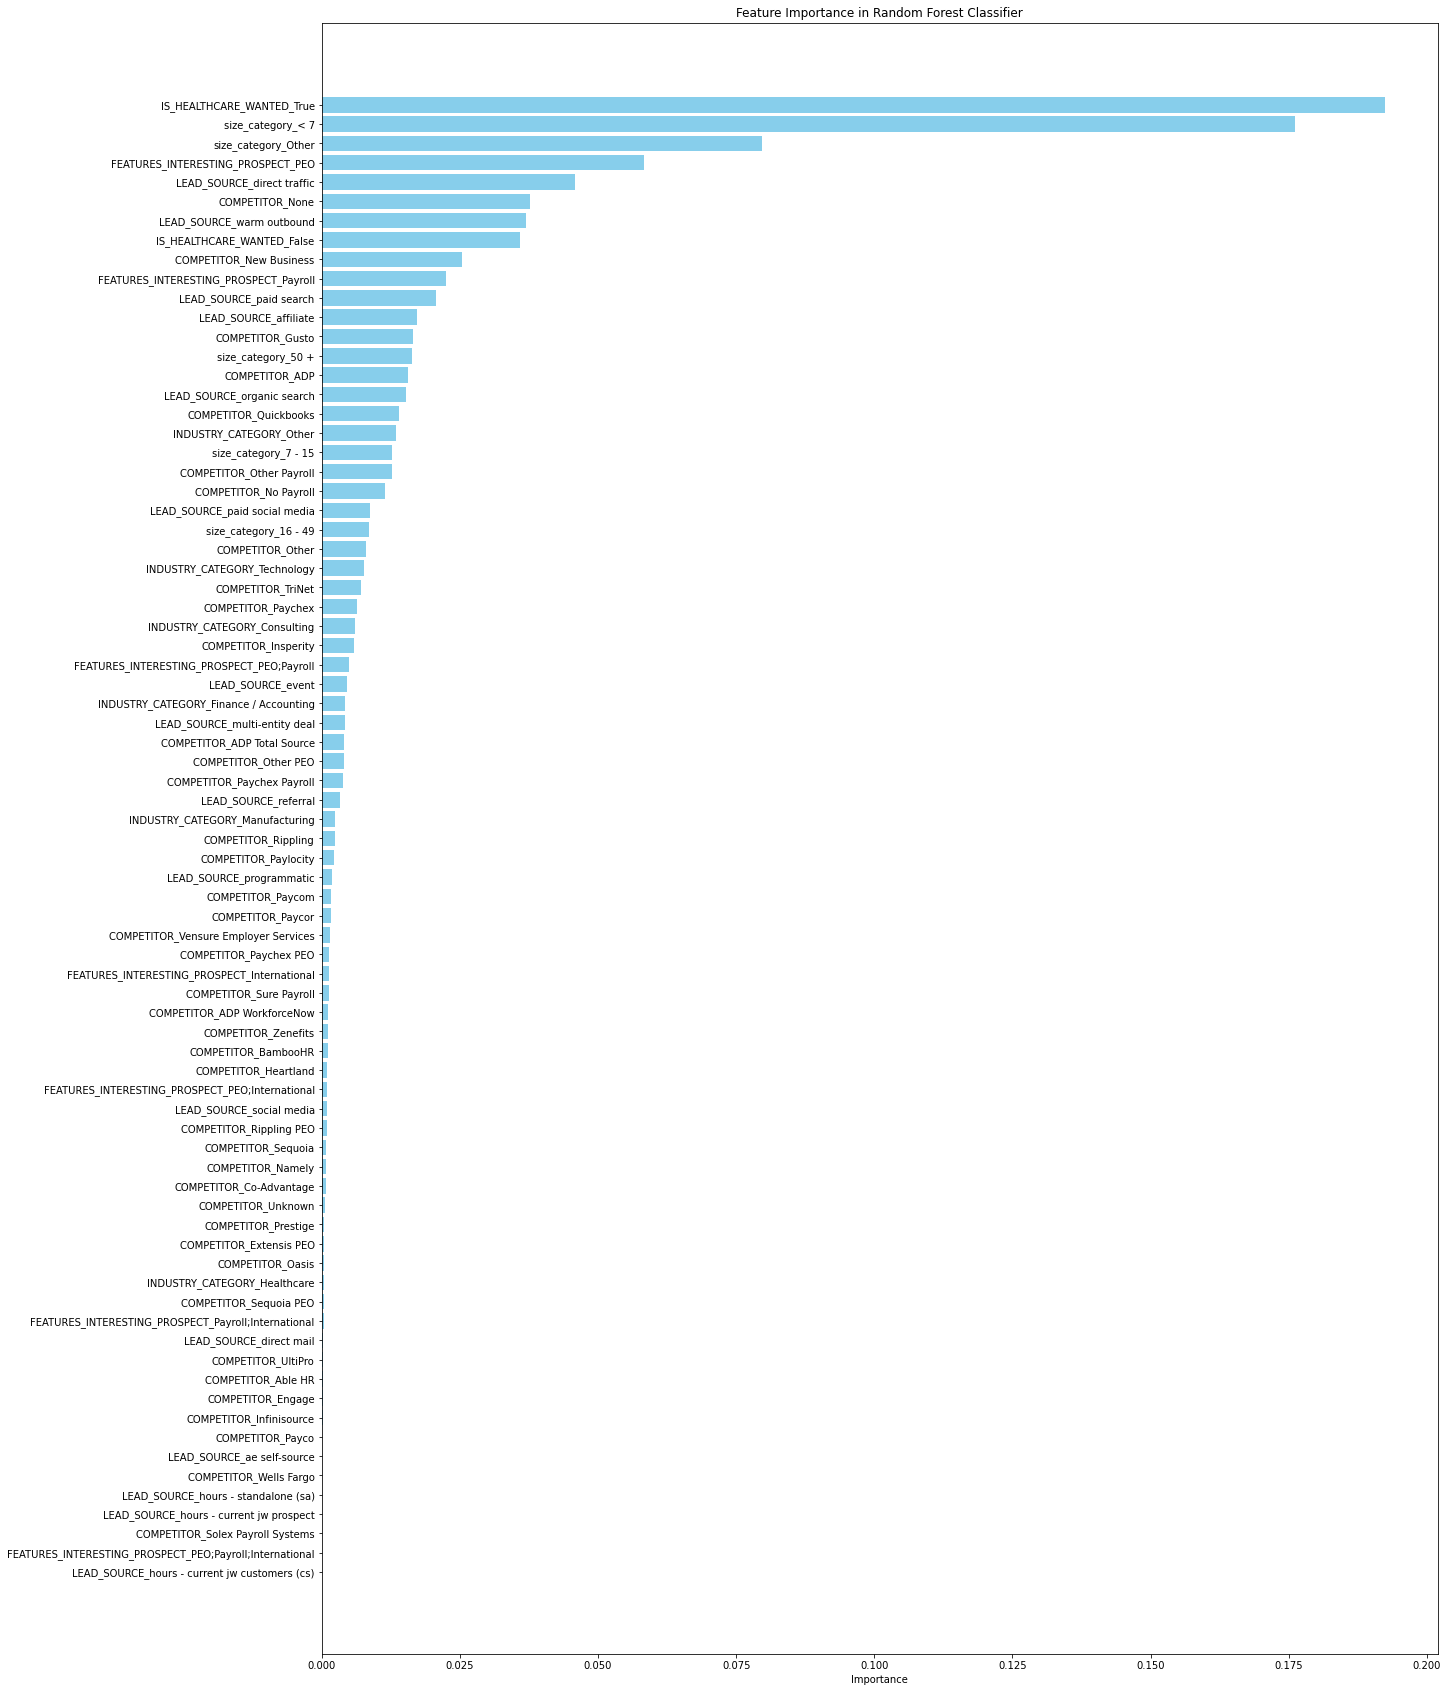

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(20, 30))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"],
    color="skyblue",
)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

hex_cell_e83c9770-363d-41c6-a469-802b6fec706f.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_corr['Converted_to_Opp'] = y.Converted_to_Opp


<Axes: >

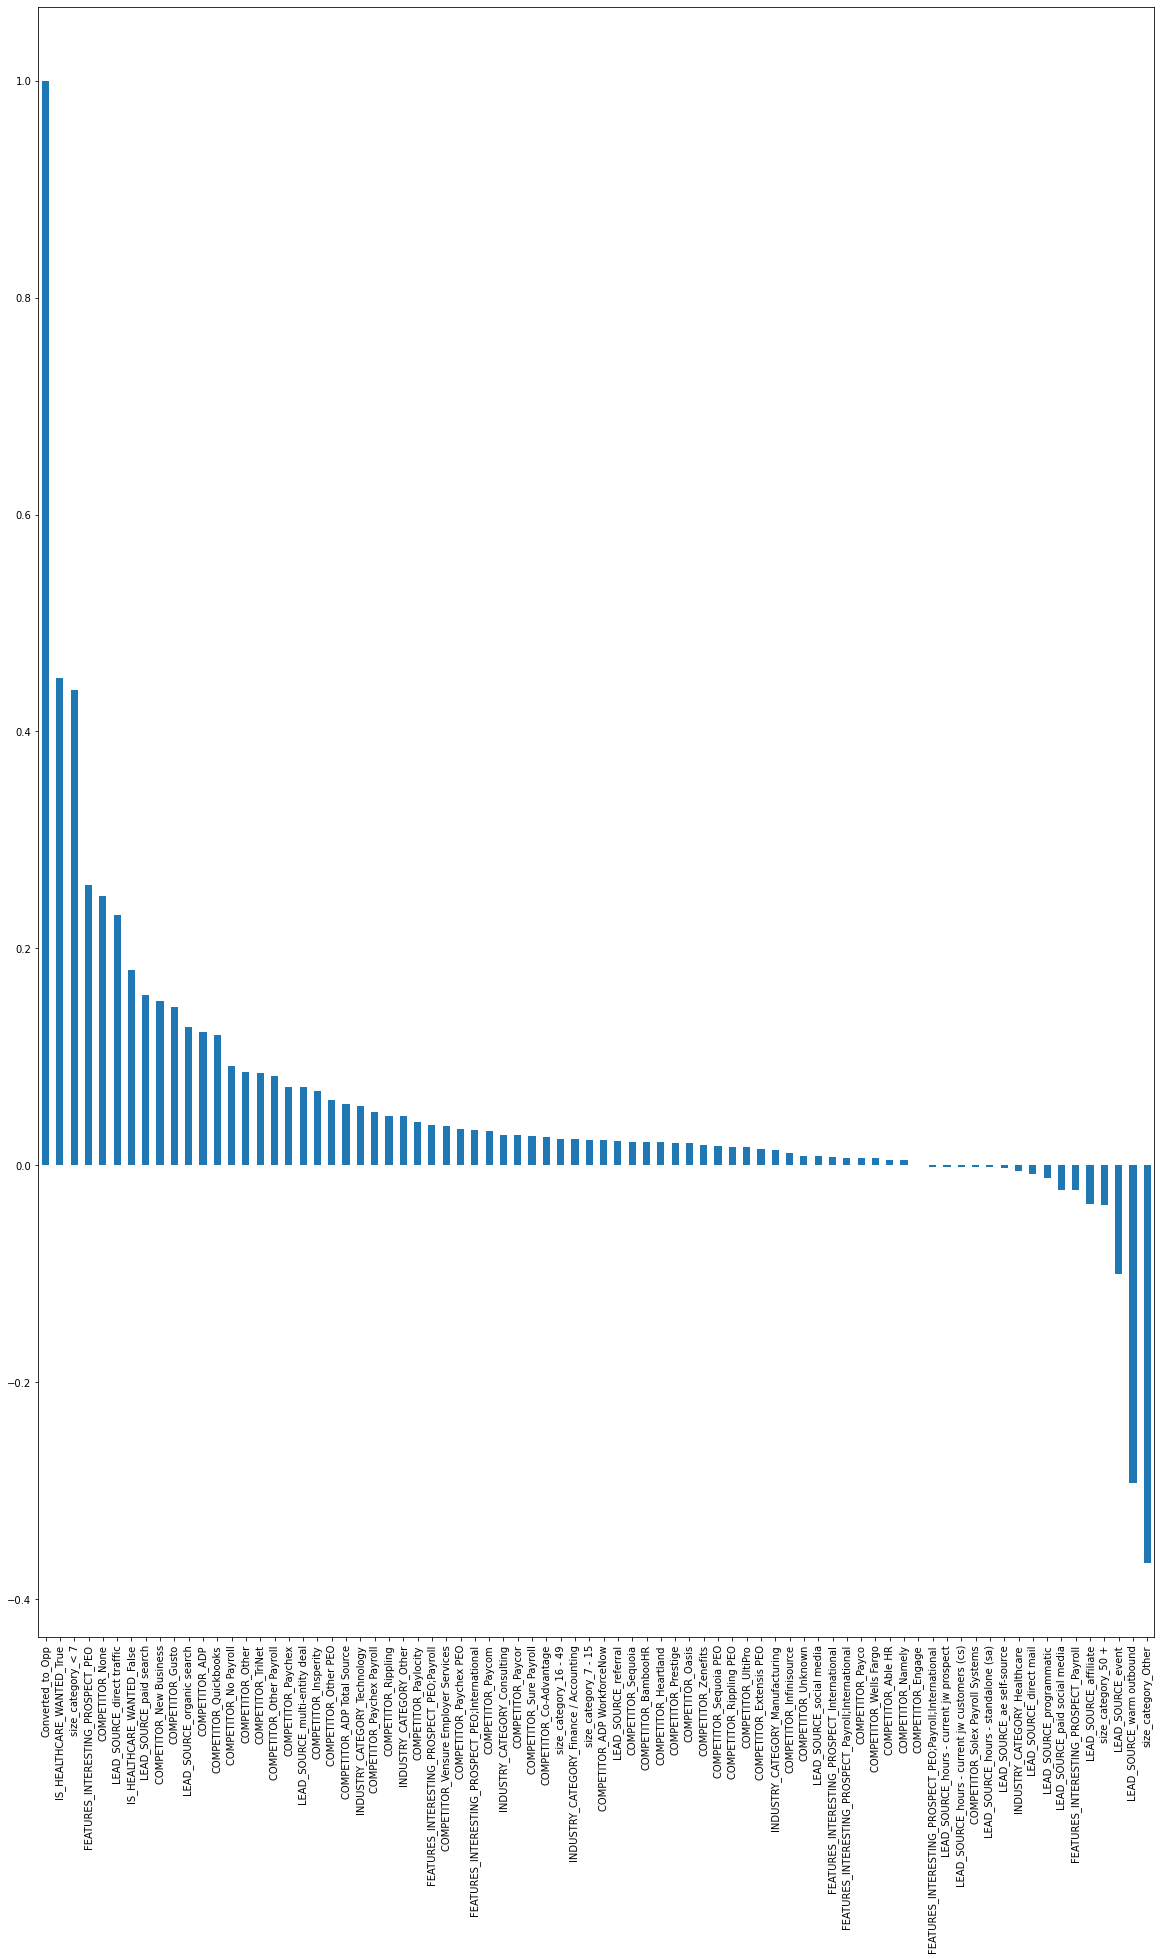

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,30))
df_to_corr = X
df_to_corr['Converted_to_Opp'] = y.Converted_to_Opp
df_to_corr.corr()['Converted_to_Opp'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
corr_df = pd.DataFrame(df_to_corr.corr()['Converted_to_Opp'].sort_values(ascending = False))

In [ ]:
corr_df.head(10)

,Converted_to_Opp
Converted_to_Opp,1.000000
IS_HEALTHCARE_WANTED_True,0.449539
size_category_< 7,0.438170
FEATURES_INTERESTING_PROSPECT_PEO,0.258020
COMPETITOR_None,0.248368
LEAD_SOURCE_direct traffic,0.230892
IS_HEALTHCARE_WANTED_False,0.180389
LEAD_SOURCE_paid search,0.157475
COMPETITOR_New Business,0.151211
COMPETITOR_Gusto,0.145568


In [ ]:
corr_df.tail(5)

,Converted_to_Opp
LEAD_SOURCE_affiliate,-0.036009
size_category_50 +,-0.036778
LEAD_SOURCE_event,-0.100172
LEAD_SOURCE_warm outbound,-0.293127
size_category_Other,-0.366723


In [ ]:
df_to_corr.head()

,LEAD_SOURCE_ae self-source,LEAD_SOURCE_affiliate,LEAD_SOURCE_direct mail,LEAD_SOURCE_direct traffic,LEAD_SOURCE_event,LEAD_SOURCE_hours - current jw customers (cs),LEAD_SOURCE_hours - current jw prospect,LEAD_SOURCE_hours - standalone (sa),LEAD_SOURCE_multi-entity deal,LEAD_SOURCE_organic search,...,COMPETITOR_Wells Fargo,COMPETITOR_Zenefits,IS_HEALTHCARE_WANTED_False,IS_HEALTHCARE_WANTED_True,size_category_16 - 49,size_category_50 +,size_category_7 - 15,size_category_< 7,size_category_Other,Converted_to_Opp
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1


In [ ]:
df_to_corr[
    (df_to_corr["IS_HEALTHCARE_WANTED_True"] == 1)
    & (df_to_corr["size_category_< 7"] == 1)
]['Converted_to_Opp'].count()

6066

In [ ]:
df_to_corr[
    (df_to_corr["IS_HEALTHCARE_WANTED_True"] == 1)
    & (df_to_corr["size_category_< 7"] == 1)
]['Converted_to_Opp'].mean()

0.7340916584240026

In [ ]:
df_to_corr.shape

(136519, 78)

In [ ]:
# Get predicted probabilities on the test set
y_proba = rf_model.predict_proba(X_test)

# Display predicted probabilities
prob_df = pd.DataFrame(y_proba, columns=[f"Class_{c}_Probability" for c in rf_model.classes_])
print(prob_df)

       Class_0_Probability  Class_1_Probability
0                 0.744646             0.255354
1                 0.999910             0.000090
2                 0.999910             0.000090
3                 0.940802             0.059198
4                 0.998668             0.001332
...                    ...                  ...
40951             0.253083             0.746917
40952             0.349843             0.650157
40953             0.999910             0.000090
40954             0.999910             0.000090
40955             0.940182             0.059818

[40956 rows x 2 columns]


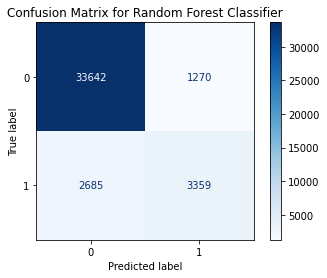

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [ ]:
print(3359/(2685 + 3359))
print(33642/(33642+1270))

0.5557577763070815
0.9636228230980751


In [ ]:

from imblearn.over_sampling import RandomOverSampler


# Oversample the minority class
oversampler = RandomOverSampler(sampling_strategy=0.5,random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Train Random Forest on the resampled dataset
model_rf_over = RandomForestClassifier(random_state=42)
model_rf_over.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_over = model_rf_over.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))

hex_cell_b349d696-7d47-47b1-bd70-f6e0b01c3f86.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_over = RandomForestClassifier(random_state=42)
Accuracy: 0.8844857896278934
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     34912
           1       0.58      0.79      0.67      6044

    accuracy                           0.88     40956
   macro avg       0.77      0.85      0.80     40956
weighted avg       0.91      0.88      0.89     40956



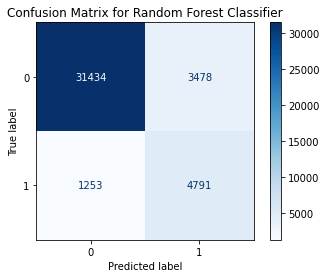

In [ ]:
# Create and display the confusion matrix
cm_over = confusion_matrix(y_test, y_pred_over)
disp_over = ConfusionMatrixDisplay(confusion_matrix=cm_over, display_labels=model_rf_over.classes_)
disp_over.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [ ]:
print(4791/(4791 + 1253))
print(31434/(3478+31434))

0.792686962276638
0.900378093492209


Accuracy: 90.29%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     34912
           1       0.73      0.55      0.62      6044

    accuracy                           0.90     40956
   macro avg       0.83      0.76      0.78     40956
weighted avg       0.90      0.90      0.90     40956

Confusion Matrix:
 [[33683  1229]
 [ 2748  3296]]


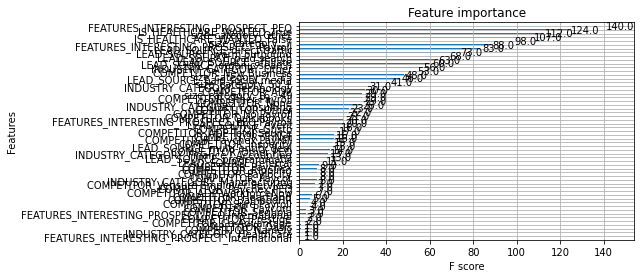

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import  GridSearchCV
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import pandas as pd
# import matplotlib.pyplot as plt

# Split the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xg_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Convert feature names to strings and remove special characters
X_train.columns = X_train.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace('[\[\]<]', '', regex=True)

# Now train the model
xg_model.fit(X_train, y_train)

# Train the model
xg_model.fit(X_train, y_train)

# Predict on test data
y_pred_xg = xg_model.predict(X_test)

# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred_xg) * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_xg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xg))

# Plot feature importance
xgb.plot_importance(xg_model)
plt.show()


Confusion Matrix:
 [[33683  1229]
 [ 2748  3296]]


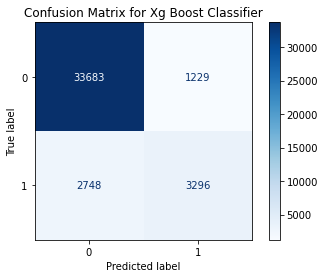

In [ ]:
# Create and display the confusion matrix
# Step 3: Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xg)
print("Confusion Matrix:\n", conf_matrix)

cm_xg = confusion_matrix(y_test, y_pred_xg)
disp_over = ConfusionMatrixDisplay(confusion_matrix=cm_xg, display_labels=xg_model.classes_)
disp_over.plot(cmap='Blues')
plt.title("Confusion Matrix for Xg Boost Classifier")
plt.show()